# Software Demo: The RFM Framework

Author: Manon Reusens

We will start by loading in the required packages. If any of these packages are not installed yet on your device, please use the command 'pip install' and then the name of the package. For example: 'pip install pandas'

In [ ]:
import pandas as pd
import datetime

## The Dataset

The next step is to load in the dataset.

In [ ]:
df=pd.read_excel('dataset_RFM.xlsx') #change this path to the location of the dataset on your computer

Let's have a look at the dataset itself and print out the first five rows. Moreover, we also have a look at the dtypes and missing values.

In [ ]:
df.head()

Customer ID Date of Purchase Item of Purchase  Price
0        24157       2023-06-13            music  24.60
1        24397       2023-05-25            games  26.42
2        31393       2023-06-18            games  22.86
3        18294       2023-06-16            books  45.49
4        21005       2023-09-13            games  19.92

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer ID       500 non-null    int64         
 1   Date of Purchase  500 non-null    datetime64[ns]
 2   Item of Purchase  500 non-null    object        
 3   Price             500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 15.8+ KB


As can be seen, there are 4 columns. Customer ID, Date of Purchase, Item of Purchase, and the Price. The dataset contains information on 500 customers and fortunately, there are no missing values. Let's look into the columns Date of Purchase, Item of Purchase, and Price now into more detail.

### Customer ID

Now we will check how many customers were in the dataset.

In [ ]:
len(df['Customer ID'].unique())

100

### Date of Purchase

As shown before, this column is considered as type datetime. Next, we determine the range of the dates:

In [ ]:
print('The first date in the dataset is: '+str(min(df['Date of Purchase'])))
print('The last date in the dataset is: '+str(max(df['Date of Purchase'])))

The first date in the dataset is: 2023-01-01 00:00:00
The last date in the dataset is: 2023-12-30 00:00:00


### Item of Purchase

The Item of Purchase column is an object column. Now, we will check the number of unique values and count the number of occurrences for each of them.

In [ ]:
df['Item of Purchase'].value_counts()

games    191
books    162
music    147
Name: Item of Purchase, dtype: int64

### Price

This column can be summarized as follows:

In [ ]:
df['Price'].describe()

count    500.000000
mean      30.449820
std       11.108543
min       10.120000
25%       21.832500
50%       30.180000
75%       39.790000
max       49.960000
Name: Price, dtype: float64

## Calculating Recency, Frequency and Monetary Variables

Now that we have a good understanding of the dataset, we will calculate the Recency, Frequency, and Monetary Variables for all of the customers. 

### Recency

We will start by calculating the Recency. The Recency is calculated as the interval between the last date of purchase and today (01/01/2024)

In [ ]:
today= datetime.datetime(2024,1,1)

We take the last date of purchase of each customer and make a dataframe with it.

In [ ]:
df_recency=df.groupby(by='Customer ID',as_index=False)['Date of Purchase'].max()

In [ ]:
df_recency.columns = ['Customer ID', 'Last Purchase Date']

Now, we calculate the interval between today and the laste date of purchase and add it to the table.

In [ ]:
recency=[]
for i in df_recency['Last Purchase Date']:
    recency.append(today-i)

In [ ]:
df_recency['Recency']=recency

In [ ]:
print(df_recency)

    Customer ID Last Purchase Date  Recency
0         10542         2023-10-17  76 days
1         10564         2023-12-16  16 days
2         10935         2023-07-26 159 days
3         11125         2023-07-12 173 days
4         11340         2023-12-15  17 days
..          ...                ...      ...
95        39033         2023-06-22 193 days
96        39389         2023-12-19  13 days
97        39442         2023-02-14 321 days
98        39713         2023-11-14  48 days
99        39813         2023-10-20  73 days

[100 rows x 3 columns]


Next, we merge the new table with the old one, where the Customer IDs are matched.

In [ ]:
df=pd.merge(df,df_recency)

In [ ]:
df.head()

Customer ID Date of Purchase Item of Purchase  Price Last Purchase Date  \
0        24157       2023-06-13            music  24.60         2023-09-23   
1        24157       2023-02-28            games  21.72         2023-09-23   
2        24157       2023-08-28            books  46.19         2023-09-23   
3        24157       2023-06-24            games  15.09         2023-09-23   
4        24157       2023-09-09            books  44.97         2023-09-23   

   Recency  
0 100 days  
1 100 days  
2 100 days  
3 100 days  
4 100 days

### Frequency

We calculate the Frequency as the number of purchases in the dataset.

In [ ]:
df_frequency=pd.DataFrame(df['Customer ID'].value_counts().rename_axis('Customer ID').reset_index(name='Frequency'))

In [ ]:
print(df_frequency)

    Customer ID  Frequency
0         36404         11
1         14313         11
2         33667         11
3         20346         10
4         39389          9
..          ...        ...
95        23673          1
96        11125          1
97        38366          1
98        11625          1
99        24073          1

[100 rows x 2 columns]


Now, we merge the two datasets.

In [ ]:
df=pd.merge(df,df_frequency)

In [ ]:
df.head()

Customer ID Date of Purchase Item of Purchase  Price Last Purchase Date  \
0        24157       2023-06-13            music  24.60         2023-09-23   
1        24157       2023-02-28            games  21.72         2023-09-23   
2        24157       2023-08-28            books  46.19         2023-09-23   
3        24157       2023-06-24            games  15.09         2023-09-23   
4        24157       2023-09-09            books  44.97         2023-09-23   

   Recency  Frequency  
0 100 days          8  
1 100 days          8  
2 100 days          8  
3 100 days          8  
4 100 days          8

### Monetary

We calculate the Monetary variable as the average spending per customer.

In [ ]:
df_monetary=df.groupby(by='Customer ID',as_index=False)['Price'].mean()

In [ ]:
df_monetary.columns = ['Customer ID', 'Monetary']

Next, we again merge the two datasets

In [ ]:
df=pd.merge(df,df_monetary)

In [ ]:
df.head()

Customer ID Date of Purchase Item of Purchase  Price Last Purchase Date  \
0        24157       2023-06-13            music  24.60         2023-09-23   
1        24157       2023-02-28            games  21.72         2023-09-23   
2        24157       2023-08-28            books  46.19         2023-09-23   
3        24157       2023-06-24            games  15.09         2023-09-23   
4        24157       2023-09-09            books  44.97         2023-09-23   

   Recency  Frequency  Monetary  
0 100 days          8    30.445  
1 100 days          8    30.445  
2 100 days          8    30.445  
3 100 days          8    30.445  
4 100 days          8    30.445

### RFM dataset

In [ ]:
df_rfm=pd.merge(df_recency,df_frequency)

In [ ]:
df_rfm=pd.merge(df_rfm,df_monetary)

In [ ]:
df_rfm.drop('Last Purchase Date', inplace= True,axis=1)

In [ ]:
print(df_rfm)

    Customer ID  Recency  Frequency   Monetary
0         10542  76 days          3  28.910000
1         10564  16 days          7  26.984286
2         10935 159 days          6  33.018333
3         11125 173 days          1  26.630000
4         11340  17 days          6  27.378333
..          ...      ...        ...        ...
95        39033 193 days          5  29.520000
96        39389  13 days          9  29.822222
97        39442 321 days          1  12.290000
98        39713  48 days          6  31.303333
99        39813  73 days          6  30.186667

[100 rows x 4 columns]


## Sorting the dataset into tertiles and adding the RFM score

We will start by sorting the recency into tertiles and label them in as bin 1 to 3, with bin 1 representing the most ancient buyers.

In [ ]:
df_rfm['Recency Bin']= pd.qcut(df_rfm['Recency'], 3, labels=['3','2','1'])

The frequency column will be sorted as follows. The tertile with the least number of transactions will be represented by bin 1. The customers that buy most frequently are represented by bin 3.

In [ ]:
df_rfm['Frequency Bin']= pd.qcut(df_rfm['Frequency'], 3, labels=['1','2','3'])

Lastly, also the Monetary column is divided into tertiles, with bin one representing the lowest average spending customers.

In [ ]:
df_rfm['Monetary Bin']= pd.qcut(df_rfm['Monetary'], 3, labels=['1','2','3'])

In [ ]:
df_rfm

Customer ID  Recency  Frequency   Monetary Recency Bin Frequency Bin  \
0         10542  76 days          3  28.910000           2             1   
1         10564  16 days          7  26.984286           3             3   
2         10935 159 days          6  33.018333           1             2   
3         11125 173 days          1  26.630000           1             1   
4         11340  17 days          6  27.378333           3             2   
..          ...      ...        ...        ...         ...           ...   
95        39033 193 days          5  29.520000           1             2   
96        39389  13 days          9  29.822222           3             3   
97        39442 321 days          1  12.290000           1             1   
98        39713  48 days          6  31.303333           2             2   
99        39813  73 days          6  30.186667           2             2   

   Monetary Bin  
0             2  
1             1  
2             3  
3             1  
4             1  
..          ...  
95            2  
96            2  
97            1  
98            2  
99            2  

[100 rows x 7 columns]

Now, we will add the RFM score to the dataset for each customer

In [ ]:
rfm_score=[]
for i in range(len(df_rfm)):
    rfm_score.append(str(df_rfm['Recency Bin'][i])+str(df_rfm['Frequency Bin'][i])+str(df_rfm['Monetary Bin'][i]))

In [ ]:
df_rfm['RFM Score']= rfm_score

In [ ]:
df_rfm

Customer ID  Recency  Frequency   Monetary Recency Bin Frequency Bin  \
0         10542  76 days          3  28.910000           2             1   
1         10564  16 days          7  26.984286           3             3   
2         10935 159 days          6  33.018333           1             2   
3         11125 173 days          1  26.630000           1             1   
4         11340  17 days          6  27.378333           3             2   
..          ...      ...        ...        ...         ...           ...   
95        39033 193 days          5  29.520000           1             2   
96        39389  13 days          9  29.822222           3             3   
97        39442 321 days          1  12.290000           1             1   
98        39713  48 days          6  31.303333           2             2   
99        39813  73 days          6  30.186667           2             2   

   Monetary Bin RFM Score  
0             2       212  
1             1       331  
2             3       123  
3             1       111  
4             1       321  
..          ...       ...  
95            2       122  
96            2       332  
97            1       111  
98            2       222  
99            2       222  

[100 rows x 8 columns]

We now also calculate an overall RFM score according to the following formula: 
overall RFM score= 0.1*Recency+0.5*Frequency+0.4*Monetary.

In [ ]:
overall_rfm_score=[]
for i in range(len(df_rfm)):
    overall_rfm_score.append(0.1*int(df_rfm['Recency Bin'][i])+0.5*int(df_rfm['Frequency Bin'][i])+0.4*int(df_rfm['Monetary Bin'][i]))

In [ ]:
df_rfm['Overall RFM Score']=overall_rfm_score

In [ ]:
df_rfm

Customer ID  Recency  Frequency   Monetary Recency Bin Frequency Bin  \
0         10542  76 days          3  28.910000           2             1   
1         10564  16 days          7  26.984286           3             3   
2         10935 159 days          6  33.018333           1             2   
3         11125 173 days          1  26.630000           1             1   
4         11340  17 days          6  27.378333           3             2   
..          ...      ...        ...        ...         ...           ...   
95        39033 193 days          5  29.520000           1             2   
96        39389  13 days          9  29.822222           3             3   
97        39442 321 days          1  12.290000           1             1   
98        39713  48 days          6  31.303333           2             2   
99        39813  73 days          6  30.186667           2             2   

   Monetary Bin RFM Score  Overall RFM Score  
0             2       212                1.5  
1             1       331                2.2  
2             3       123                2.3  
3             1       111                1.0  
4             1       321                1.7  
..          ...       ...                ...  
95            2       122                1.9  
96            2       332                2.6  
97            1       111                1.0  
98            2       222                2.0  
99            2       222                2.0  

[100 rows x 9 columns]

Now we will group the customers in the following categories: 
<br>top 6%: Diamond
<br>6-12% : Gold
<br>12-31%: Silver
<br>31-63%: Bronze
<br>63-100%: Low Value

In [ ]:
bin_labels_5 = ['Low Value','Bronze', 'Silver', 'Gold','Diamond']
df_rfm['Client Category'] = pd.qcut(df_rfm['Overall RFM Score'],q=[0, .37, .69, .88, .94, 1],labels=bin_labels_5)
df_rfm.head()


Customer ID  Recency  Frequency   Monetary Recency Bin Frequency Bin  \
0        10542  76 days          3  28.910000           2             1   
1        10564  16 days          7  26.984286           3             3   
2        10935 159 days          6  33.018333           1             2   
3        11125 173 days          1  26.630000           1             1   
4        11340  17 days          6  27.378333           3             2   

  Monetary Bin RFM Score  Overall RFM Score Client Category  
0            2       212                1.5       Low Value  
1            1       331                2.2          Silver  
2            3       123                2.3          Silver  
3            1       111                1.0       Low Value  
4            1       321                1.7          Bronze

here a visual representation of the distribution of the clients:

<AxesSubplot:>

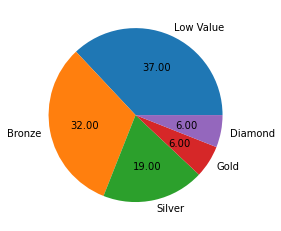

In [ ]:
df_rfm.groupby('Client Category').size().plot(kind='pie', autopct='%.2f',ylabel='')

## Profit Analysis example

Now, we will work out two profit analysis examples.

### Scenario 1

<table ><tr><th > Customer <th><th> Response Rate <tr><tr>
<tr><td> Diamond <td><td> 15% <td><tr>
<tr><td> Gold <td><td> 11% <td><tr>
<tr><td> Silver <td><td> 2% <td><tr>
<tr><td> Bronze <td><td> 0.5% <td><tr>
<tr><td> Low Value <td><td> 0.1% <td><tr><table >

We send out a flyer to our customers. The cost per message is 4 dollars. The average gross revenue per response equals 40 dollars. With r the response rate, the profit becomes: '(40-4)r-4+4r' if we now want to have positive profit we need a response rate over 10%

Given the above table, we will only target Diamond and Gold customers.

### Scenario 2

<table ><tr><th > Customer <th><th> Response Rate <tr><tr>
<tr><td> Diamond <td><td> 9% <td><tr>
<tr><td> Gold <td><td> 7% <td><tr>
<tr><td> Silver <td><td> 5% <td><tr>
<tr><td> Bronze <td><td> 3% <td><tr>
<tr><td> Low Value <td><td> 1% <td><tr><table >

We send out an email to our customers. The cost per message is 1 dollar. The average gross revenue per response equals 50 dollars. With r the response rate, the profit becomes: '(50-1)r-1+r' if we now want to have positive profit we need a response rate over 2%

Given the above table, we will target the Diamond, Gold, Silver, and Bronze customers.